<a href="https://colab.research.google.com/github/4Kaustubh/Sentiment-Analysis-NLP/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Generation

## Introduction

Markov chains can be used for very basic text generation. Think about every word in a corpus as a state. We can make a simple assumption that the next word is only dependent on the previous word - which is the basic assumption of a Markov chain.

Markov chains don't generate text as well as deep learning, but it's a good (and fun!) start.

## Select Text to Imitate

In this notebook, we're specifically going to generate text in the style of Ali Wong, so as a first step, let's extract the text from her comedy routine.

In [ ]:
# Read in the corpus, including punctuation!
import pandas as pd

data = pd.read_pickle('/content/corpus (1).pkl')
data

,transcript,full_name
ali,\n\n\n\n\n\n\n\nAli Wong: Baby Cobra (2016) |...,Ali Wong
anthony,\n\n\n\n\n\n\n\nAnthony Jeselnik: Thoughts An...,Anthony Jeselnik
bill,\n\n\n\n\n\n\n\nBILL BURR: I'M SORRY YOU FEEL...,Bill Burr
bo,\n\n\n\n\n\n\n\nScraps from the loft\n\n\n\n\...,Bo Burnham
dave,\n\n\n\n\n\n\n\nDave Chappelle: The Age of Sp...,Dave Chappelle
gabriel,\n\n\n\n\n\n\n\nGabriel Iglesias: Legend of F...,Gabriel Iglesias
hasan,\n\n\n\n\n\n\n\nScraps from the loft\n\n\n\n\...,Hasan Minhaj
jamie,\n\n\n\n\n\n\n\nJamie Foxx: What Had Happened...,Jamie Foxx
jerrod,\n\n\n\n\n\n\n\nJerrod Carmichael: Rothaniel ...,Jerrod Carmichael
jim,\n\n\n\n\n\n\n\nJIM JEFFERIES: BARE (2014) - ...,Jim Jefferies


In [ ]:
# Extract only Ali Wong's text
ali_text = data.transcript.loc['ali']
ali_text[:300]

' \n\n\n\n\n\n\n\nAli Wong: Baby Cobra (2016) | Transcript - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\tSkip to content\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\t\t\t\t\t\tSearch\t\t\t\t\t\n \n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES\n\nMOVIE REVIEWS\nMOVIE TRANSCRIPTS\n\n\nTV SERIES\n\nTV SHOW'

## Build a Markov Chain Function

We are going to build a simple Markov chain function that creates a dictionary:
* The keys should be all of the words in the corpus
* The values should be a list of the words that follow the keys

In [ ]:
from collections import defaultdict

def markov_chain(text):
    '''The input is a string of text and the output will be a dictionary with each word as
       a key and each value as the list of words that come after the key in the text.'''

    # Tokenize the text by word, though including punctuation
    words = text.split(' ')

    # Initialize a default dictionary to hold all of the words and next words
    m_dict = defaultdict(list)

    # Create a zipped list of all of the word pairs and put them in word: list of next words format
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # Convert the default dict back into a dictionary
    m_dict = dict(m_dict)
    return m_dict

In [ ]:
# Create the dictionary for Ali's routine, take a look at it
ali_dict = markov_chain(ali_text)
ali_dict;

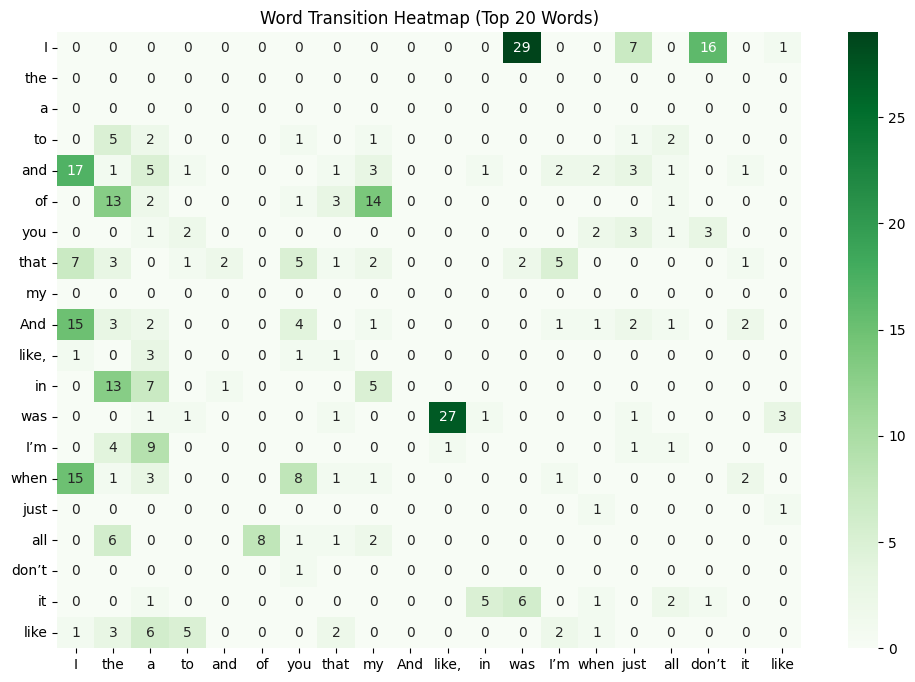

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_transition_heatmap(chain, top_n=20):
    import pandas as pd

    # Get the top N frequent words
    top_words = pd.Series({k: len(v) for k, v in chain.items()}).sort_values(ascending=False).head(top_n).index

    # Create a transition matrix
    matrix = pd.DataFrame(0, index=top_words, columns=top_words)

    for word, next_words in chain.items():
        if word in top_words:
            for next_word in next_words:
                if next_word in top_words:
                    matrix.loc[word, next_word] += 1

    plt.figure(figsize=(12,8))
    sns.heatmap(matrix, cmap="Greens", annot=True, fmt='d')
    plt.title('Word Transition Heatmap (Top {} Words)'.format(top_n))
    plt.show()

plot_transition_heatmap(ali_dict)


In [ ]:
import random

def generate_sentence(chain, count=10):
    word = random.choice(list(chain.keys()))
    sentence = [word]
    for _ in range(count - 1):
        next_words = chain.get(word, None)
        if not next_words:
            break
        word = random.choice(next_words)
        sentence.append(word)
    return ' '.join(sentence)


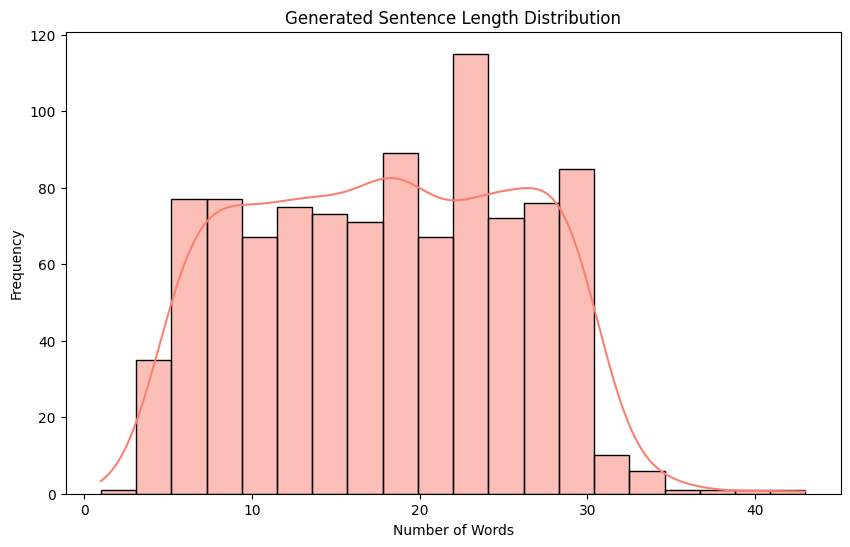

In [ ]:
import random
import matplotlib.pyplot as plt
import seaborn as sns

def plot_generated_length_distribution(chain, samples=1000, color='skyblue'):
    lengths = []
    for _ in range(samples):
        # Assuming generate_sentence function is defined elsewhere
        sentence = generate_sentence(chain, count=random.randint(5, 30))
        lengths.append(len(sentence.split()))

    plt.figure(figsize=(10,6))
    sns.histplot(lengths, bins=20, kde=True, color=color) # Changed the color here
    plt.title('Generated Sentence Length Distribution')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.show()

# Assuming ali_dict is defined elsewhere
# Example usage with a different color:
plot_generated_length_distribution(ali_dict, color='salmon')

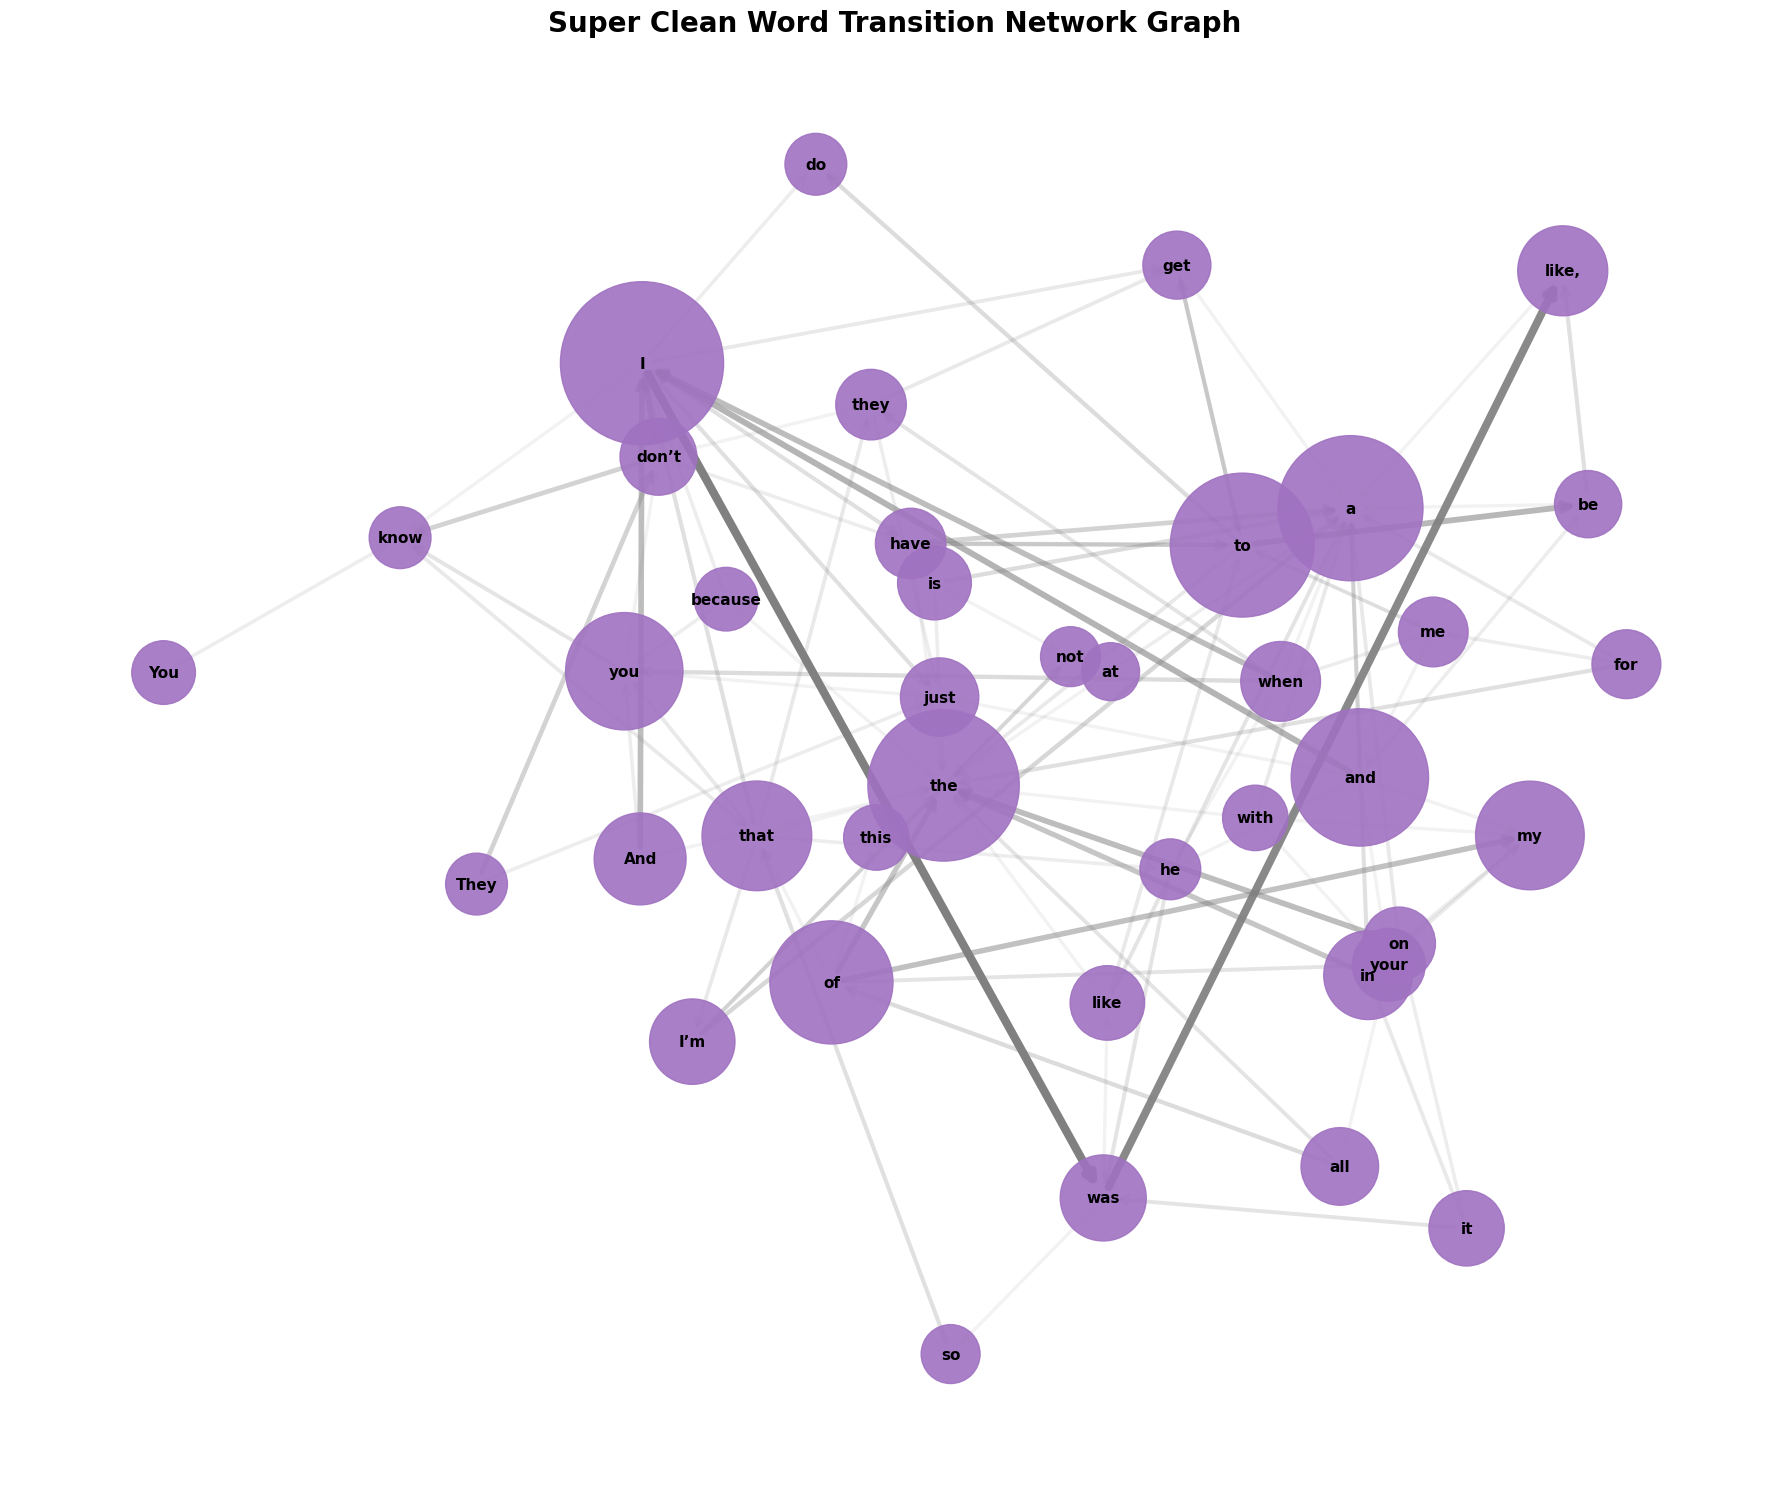

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import numpy as np

def plot_transition_network_clean(chain, top_n=40, min_edge_freq=3):
    G = nx.DiGraph()
    word_freq = pd.Series({k: len(v) for k, v in chain.items()})
    top_words = word_freq.sort_values(ascending=False).head(top_n).index

    edge_counter = Counter()

    # Count edge frequencies
    for word, next_words in chain.items():
        if word in top_words:
            for next_word in next_words:
                if next_word in top_words:
                    edge_counter[(word, next_word)] += 1

    # Add only strong edges
    for (word, next_word), count in edge_counter.items():
        if count >= min_edge_freq:
            G.add_edge(word, next_word, weight=count)

    plt.figure(figsize=(18,15))
    pos = nx.kamada_kawai_layout(G)  # Better layout: avoids clutter

    node_sizes = [word_freq[word]*60 for word in G.nodes()]
    edge_weights = [G[u][v]['weight'] for u,v in G.edges()]

    # Normalize edge weights for color intensity
    norm_weights = np.array(edge_weights) / np.max(edge_weights)
    edge_colors = [(0.5, 0.5, 0.5, w) for w in norm_weights]  # Gray with varying opacity

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="#A072C1", alpha=0.9)

    # Draw edges
    nx.draw_networkx_edges(G, pos,
                           edge_color=edge_colors,
                           width=[2 + w*4 for w in norm_weights],
                           arrows=True,
                           arrowstyle='->',
                           arrowsize=15)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=11, font_family="sans-serif", font_weight="bold")

    plt.title('Super Clean Word Transition Network Graph', fontsize=20, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Try it!
plot_transition_network_clean(ali_dict, top_n=40, min_edge_freq=3)


## Create a Text Generator

We're going to create a function that generates sentences. It will take two things as inputs:
* The dictionary you just created
* The number of words you want generated

Here are some examples of generated sentences:

>'Shape right turn– I also takes so that she’s got women all know that snail-trail.'

>'Optimum level of early retirement, and be sure all the following Tuesday… because it’s too.'

In [ ]:
import random

def generate_sentence(chain, count=15):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # End it with a period
    sentence += '.'
    return(sentence)

In [ ]:
generate_sentence(ali_dict)

'So. You go time,” and then we just gonna happen to spank me, he’s gonna.'

## Additional Exercises

1. Try making the generate_sentence function better. Maybe allow it to end with a random punctuation mark or end whenever it gets to a word that already ends with a punctuation mark.

In [ ]:
import random

def generate_sentence_better(chain, count=15):
    '''Input a dictionary with word: list of next words,
       and generate a sentence that ends naturally when punctuation is encountered or randomly ends with punctuation.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # List of possible end punctuations
    end_punctuations = ['.', '!', '?']

    for i in range(count-1):
        if word1 not in chain:  # Safety check
            break
        word2 = random.choice(chain[word1])
        sentence += ' ' + word2
        word1 = word2

        # Check if current word ends with punctuation
        if word2[-1] in end_punctuations:
            break

    # If it doesn't already end with punctuation, randomly add one
    if sentence[-1] not in end_punctuations:
        sentence += random.choice(end_punctuations)

    return sentence
#Starts with a random capitalized word.

#Stops generating if a word ends in punctuation (more natural end).

#Adds punctuation at the end if none was found.

In [ ]:
generate_sentence_better(ali_dict)

'Decided to eat like that calculator is.'

In [ ]:
def markov_chain_bigrams(text):
    '''Build a 2nd-order (bigram) Markov chain'''
    words = text.split(' ')
    m_dict = defaultdict(list)

    for i in range(len(words) - 2):
        key = (words[i], words[i+1])
        next_word = words[i+2]
        m_dict[key].append(next_word)

    return dict(m_dict)

# Create the bigram chain
ali_dict_bigram = markov_chain_bigrams(ali_text)


In [ ]:
def generate_sentence_bigram(chain, count=15):
    key = random.choice(list(chain.keys()))
    sentence = [key[0].capitalize(), key[1]]

    for _ in range(count-2):
        if key not in chain:
            break
        next_word = random.choice(chain[key])
        sentence.append(next_word)
        key = (key[1], next_word)

    return ' '.join(sentence) + random.choice(['.', '!', '?'])

# Example
print(generate_sentence_bigram(ali_dict_bigram))


Poem about… …supporting Caitlyn Jenner or whatever. And so, it’s funny, right, because he’s Asian,?


In [ ]:
# Start with a meaningful word
# Instead of completely random, start sentences with a common word like "I", "She", "My", etc. (makes it sound more like Ali Wong's style).
def generate_sentence_start_common(chain, count=15, start_words=['I', 'She', 'My', 'When', 'Because']):
    first_word = random.choice(start_words)
    while first_word not in chain:
        first_word = random.choice(list(chain.keys()))

    sentence = first_word.capitalize()

    word = first_word
    for _ in range(count-1):
        if word not in chain:
            break
        next_word = random.choice(chain[word])
        sentence += ' ' + next_word
        word = next_word

    if sentence[-1] not in ['.', '!', '?']:
        sentence += random.choice(['.', '!', '?'])

    return sentence

# Example
print(generate_sentence_start_common(ali_dict))


Because we’re expected to tell me to do a fuck. They make a lot of?


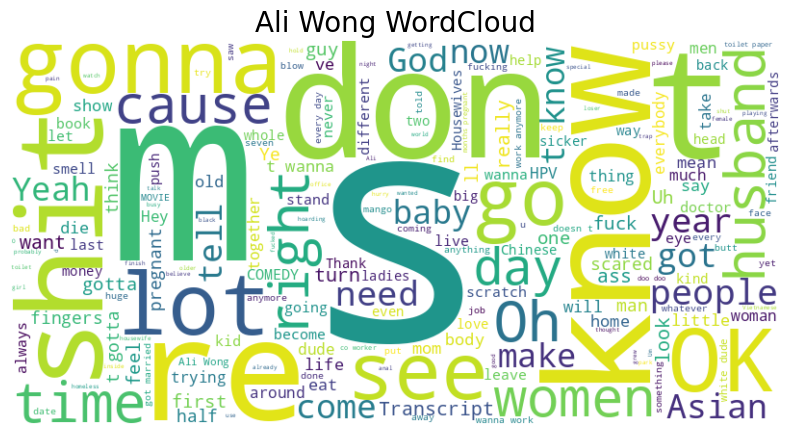

In [ ]:
from wordcloud import WordCloud

def plot_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Ali Wong WordCloud', fontsize=20)
    plt.show()

# Plot
plot_wordcloud(ali_text)
